In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as snb
import re

In [2]:
# Import dataset and convert to DataFrame
df = pd.read_csv('../data/World-Famous-Places-2024.csv')

In [3]:
# Types of data
df.dtypes

Place_Name                       object
Country                          object
City                             object
Annual_Visitors_Millions        float64
Type                             object
UNESCO_World_Heritage            object
Year_Built                       object
Entry_Fee_USD                     int64
Best_Visit_Month                 object
Region                           object
Tourism_Revenue_Million_USD       int64
Average_Visit_Duration_Hours    float64
Famous_For                       object
dtype: object

In [4]:
# Display Describe DataFrame
df.describe()

,Annual_Visitors_Millions,Entry_Fee_USD,Tourism_Revenue_Million_USD,Average_Visit_Duration_Hours
count,30.000000,30.000000,30.000000,30.000000
mean,11.331667,24.600000,593.500000,3.166667
std,12.044247,28.572473,1521.481894,2.499425
min,1.500000,0.000000,25.000000,0.500000
25%,4.775000,0.000000,61.250000,1.500000
50%,7.575000,19.000000,87.500000,2.250000
75%,12.250000,35.000000,167.500000,4.000000
max,50.000000,109.000000,6800.000000,10.000000


In [5]:
# General Info About DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Place_Name                    30 non-null     object 
 1   Country                       30 non-null     object 
 2   City                          30 non-null     object 
 3   Annual_Visitors_Millions      30 non-null     float64
 4   Type                          30 non-null     object 
 5   UNESCO_World_Heritage         30 non-null     object 
 6   Year_Built                    30 non-null     object 
 7   Entry_Fee_USD                 30 non-null     int64  
 8   Best_Visit_Month              30 non-null     object 
 9   Region                        30 non-null     object 
 10  Tourism_Revenue_Million_USD   30 non-null     int64  
 11  Average_Visit_Duration_Hours  30 non-null     float64
 12  Famous_For                    30 non-null     object 
dtypes: floa

In [6]:
# Shape DataFrame
df.shape

(30, 13)

In [7]:
# DataFrame few results
df.head()

,Place_Name,Country,City,Annual_Visitors_Millions,Type,UNESCO_World_Heritage,Year_Built,Entry_Fee_USD,Best_Visit_Month,Region,Tourism_Revenue_Million_USD,Average_Visit_Duration_Hours,Famous_For
0,Eiffel Tower,France,Paris,7.0,Monument/Tower,No,1889,35,May-June/Sept-Oct,Western Europe,95,2.5,"Iconic iron lattice tower, symbol of Paris"
1,Times Square,United States,New York City,50.0,Urban Landmark,No,1904,0,Apr-June/Sept-Nov,North America,70,1.5,"Bright lights, Broadway shows, New Year's Eve ..."
2,Louvre Museum,France,Paris,8.7,Museum,Yes,1793,22,Oct-March,Western Europe,120,4.0,"World's most visited museum, home to Mona Lisa"
3,Great Wall of China,China,Beijing/Multiple,10.0,Historic Monument,Yes,220 BC - 1644 AD,10,Apr-May/Sept-Oct,East Asia,180,4.0,Ancient defensive structure visible from space
4,Taj Mahal,India,Agra,7.5,Monument/Mausoleum,Yes,1653,15,Oct-March,South Asia,65,2.0,"White marble mausoleum, symbol of love"


## EDA DataFrame

In [8]:
# Get null values
df.isnull().sum()

Place_Name                      0
Country                         0
City                            0
Annual_Visitors_Millions        0
Type                            0
UNESCO_World_Heritage           0
Year_Built                      0
Entry_Fee_USD                   0
Best_Visit_Month                0
Region                          0
Tourism_Revenue_Million_USD     0
Average_Visit_Duration_Hours    0
Famous_For                      0
dtype: int64

In [9]:
# duplicated Data
duplicados = df.duplicated().sum()
print(f'Hay {duplicados} datos duplicados')

Hay 0 datos duplicados


In [10]:
# Duplicated by column Country
duplicate_by_country = df['Country'].value_counts()
print(f'{duplicate_by_country[duplicate_by_country > 1]}\n')
print(f'{duplicate_by_country[duplicate_by_country == 1]}\n')

Country
United States     10
France             4
United Kingdom     3
China              2
Italy              2
Name: count, dtype: int64

Country
India                   1
Australia               1
Peru                    1
Spain                   1
Cambodia                1
Egypt                   1
Greece                  1
United Arab Emirates    1
Brazil                  1
Name: count, dtype: int64



In [11]:
# Duplicate by Type
duplicate_by_type = df['Type'].value_counts()
print(f'{duplicate_by_type[duplicate_by_type > 1]}\n')
print(f'{duplicate_by_type[duplicate_by_type == 1]}\n')

Type
Historic Monument      3
Cathedral              2
Historic Palace        2
Archaeological Site    2
Monument/Statue        2
Bridge                 2
Theme Park             2
Skyscraper             2
Name: count, dtype: int64

Type
Monument/Tower            1
Monument/Mausoleum        1
Museum                    1
Urban Landmark            1
Cultural Building         1
Entertainment District    1
Park                      1
Temple Complex            1
Monument/Memorial         1
Natural Wonder            1
Historic Tower            1
Clock Tower               1
Palace                    1
Name: count, dtype: int64



In [12]:
# Duplicated by Region
duplicate_by_region = df['Region'].value_counts()
print(f'{duplicate_by_region[duplicate_by_region > 1]}\n')
print(f'{duplicate_by_region[duplicate_by_region == 1]}\n') 

Region
North America      10
Western Europe      7
Southern Europe     4
East Asia           2
South America       2
Name: count, dtype: int64

Region
South Asia        1
Oceania           1
Southeast Asia    1
North Africa      1
Middle East       1
Name: count, dtype: int64



In [13]:
MONTHS = [
    "jan","feb","mar","apr","may",
    "jun","jul","aug","sep","oct","nov","dec"
]

def parse_month_ranges(text):
    if not isinstance(text, str):
        return []

    text = text.lower().replace(" ", "")
    ranges = text.split("/")

    result = []

    for r in ranges:
        start, end = r.split("-")

        start = start[:3]
        end = end[:3]

        start_idx = MONTHS.index(start)
        end_idx = MONTHS.index(end)

        if start_idx <= end_idx:
            result.extend(MONTHS[start_idx:end_idx + 1])
        else:
            result.extend(MONTHS[start_idx:])
            result.extend(MONTHS[:end_idx + 1])

    return sorted(set(result), key=MONTHS.index)
df['Best_Visit_Month'] = df['Best_Visit_Month'].apply(parse_month_ranges)
print(df['Best_Visit_Month'])

0                              [may, jun, sep, oct]
1                    [apr, may, jun, sep, oct, nov]
2                    [jan, feb, mar, oct, nov, dec]
3                              [apr, may, sep, oct]
4                    [jan, feb, mar, oct, nov, dec]
5                              [apr, may, sep, oct]
6                         [may, jun, jul, aug, sep]
7                                   [sep, oct, nov]
8               [apr, may, jun, jul, aug, sep, oct]
9                              [apr, may, sep, oct]
10                             [jan, feb, nov, dec]
11                        [apr, may, jun, sep, oct]
12                        [may, jun, jul, aug, sep]
13                   [mar, apr, may, sep, oct, nov]
14                        [may, jun, jul, aug, sep]
15                                  [sep, oct, nov]
16                        [apr, may, jun, sep, oct]
17                        [apr, may, jun, sep, oct]
18                        [apr, may, sep, oct, nov]
19    [jan, 

In [14]:
df['Famous_For'] = df['Famous_For'].fillna('Unknown')
df['Famous_For'].value_counts()

Famous_For
Iconic iron lattice tower, symbol of Paris                 1
Bright lights, Broadway shows, New Year's Eve ball drop    1
World's most visited museum, home to Mona Lisa             1
Ancient defensive structure visible from space             1
White marble mausoleum, symbol of love                     1
Ancient Roman amphitheater for gladiator battles           1
Symbol of freedom and democracy                            1
Unique sail-like design, performing arts center            1
Ancient Incan citadel in the Andes mountains               1
Imperial palace of Ming and Qing dynasties                 1
Largest religious monument, Hindu-Buddhist temple          1
Gothic masterpiece, medieval Catholic cathedral            1
Urban park oasis in Manhattan                              1
Casino resorts, entertainment, nightlife                   1
Art Deco skyscraper, NYC icon                              1
Suspension bridge, engineering marvel                      1
Memorial to P

In [15]:
df_copy = df.copy()

In [16]:
df_copy.head()

,Place_Name,Country,City,Annual_Visitors_Millions,Type,UNESCO_World_Heritage,Year_Built,Entry_Fee_USD,Best_Visit_Month,Region,Tourism_Revenue_Million_USD,Average_Visit_Duration_Hours,Famous_For
0,Eiffel Tower,France,Paris,7.0,Monument/Tower,No,1889,35,"[may, jun, sep, oct]",Western Europe,95,2.5,"Iconic iron lattice tower, symbol of Paris"
1,Times Square,United States,New York City,50.0,Urban Landmark,No,1904,0,"[apr, may, jun, sep, oct, nov]",North America,70,1.5,"Bright lights, Broadway shows, New Year's Eve ..."
2,Louvre Museum,France,Paris,8.7,Museum,Yes,1793,22,"[jan, feb, mar, oct, nov, dec]",Western Europe,120,4.0,"World's most visited museum, home to Mona Lisa"
3,Great Wall of China,China,Beijing/Multiple,10.0,Historic Monument,Yes,220 BC - 1644 AD,10,"[apr, may, sep, oct]",East Asia,180,4.0,Ancient defensive structure visible from space
4,Taj Mahal,India,Agra,7.5,Monument/Mausoleum,Yes,1653,15,"[jan, feb, mar, oct, nov, dec]",South Asia,65,2.0,"White marble mausoleum, symbol of love"


In [17]:
df_copy.drop(columns=['UNESCO_World_Heritage', 'Year_Built', 'Entry_Fee_USD', 'Best_Visit_Month'], inplace=True)

In [18]:
df_copy.head()

,Place_Name,Country,City,Annual_Visitors_Millions,Type,Region,Tourism_Revenue_Million_USD,Average_Visit_Duration_Hours,Famous_For
0,Eiffel Tower,France,Paris,7.0,Monument/Tower,Western Europe,95,2.5,"Iconic iron lattice tower, symbol of Paris"
1,Times Square,United States,New York City,50.0,Urban Landmark,North America,70,1.5,"Bright lights, Broadway shows, New Year's Eve ..."
2,Louvre Museum,France,Paris,8.7,Museum,Western Europe,120,4.0,"World's most visited museum, home to Mona Lisa"
3,Great Wall of China,China,Beijing/Multiple,10.0,Historic Monument,East Asia,180,4.0,Ancient defensive structure visible from space
4,Taj Mahal,India,Agra,7.5,Monument/Mausoleum,South Asia,65,2.0,"White marble mausoleum, symbol of love"


## Preguntas a responder:

### ¿Cuáles son los países con mayor cantidad de lugares famosos?

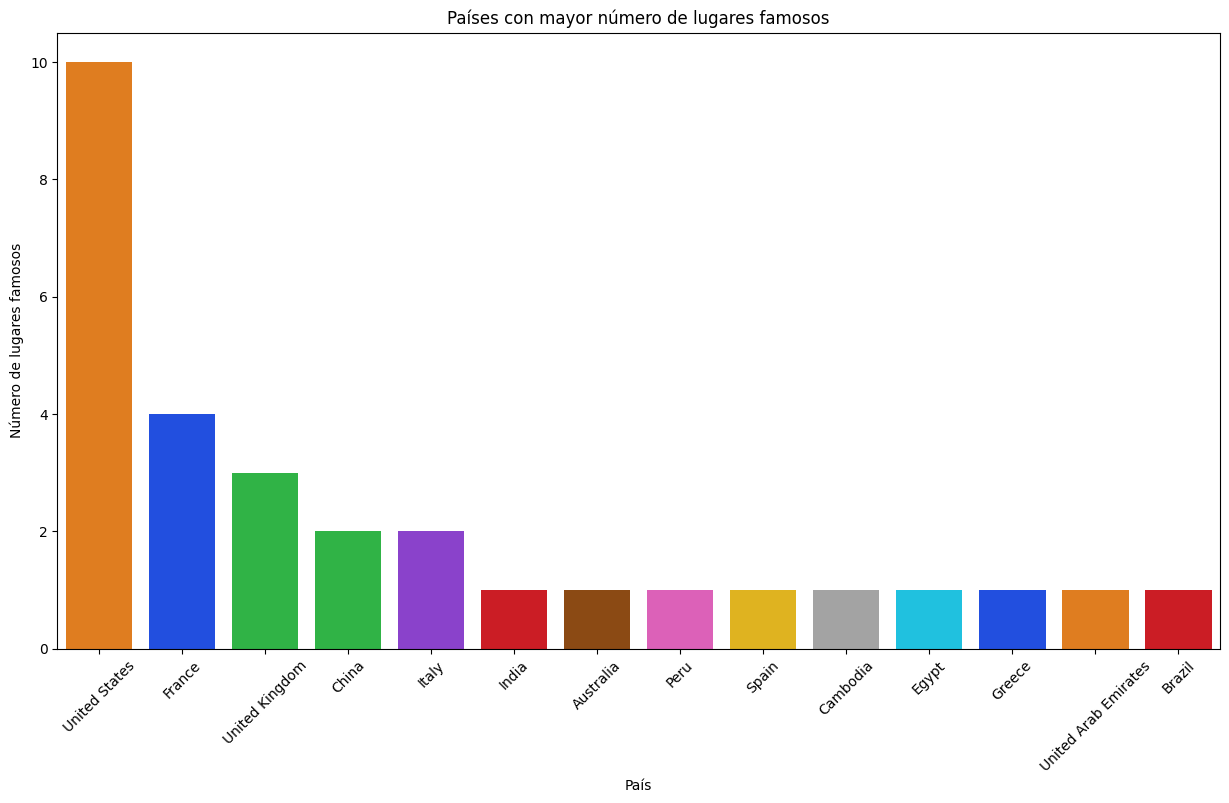

In [19]:
plt.figure(figsize=(15,8))

snb.countplot(
    data=df_copy,
    x='Country',
    hue='Country',
    order=df_copy['Country'].value_counts().index,
    palette='bright'
)

plt.title('Países con mayor número de lugares famosos')
plt.xlabel('País')
plt.ylabel('Número de lugares famosos')
plt.xticks(rotation=45)
plt.show()

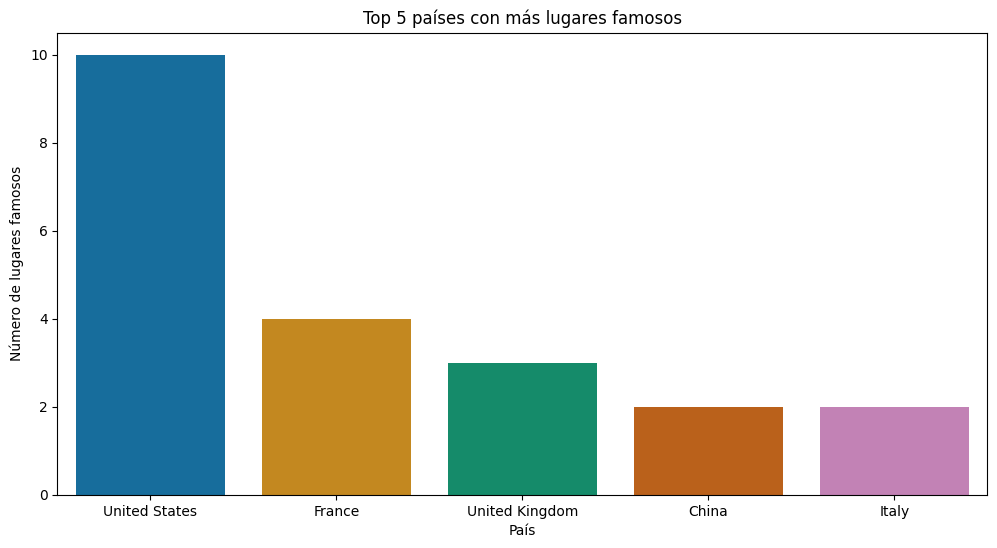

In [20]:
top_5_countries = df_copy['Country'].value_counts().head(5).reset_index()
top_5_countries.columns = ['Country', 'Count']

plt.figure(figsize=(12,6))
snb.barplot(data=top_5_countries, x='Country', y='Count', hue='Country', palette='colorblind')
plt.title('Top 5 países con más lugares famosos')
plt.xlabel('País')
plt.ylabel('Número de lugares famosos')
plt.show()

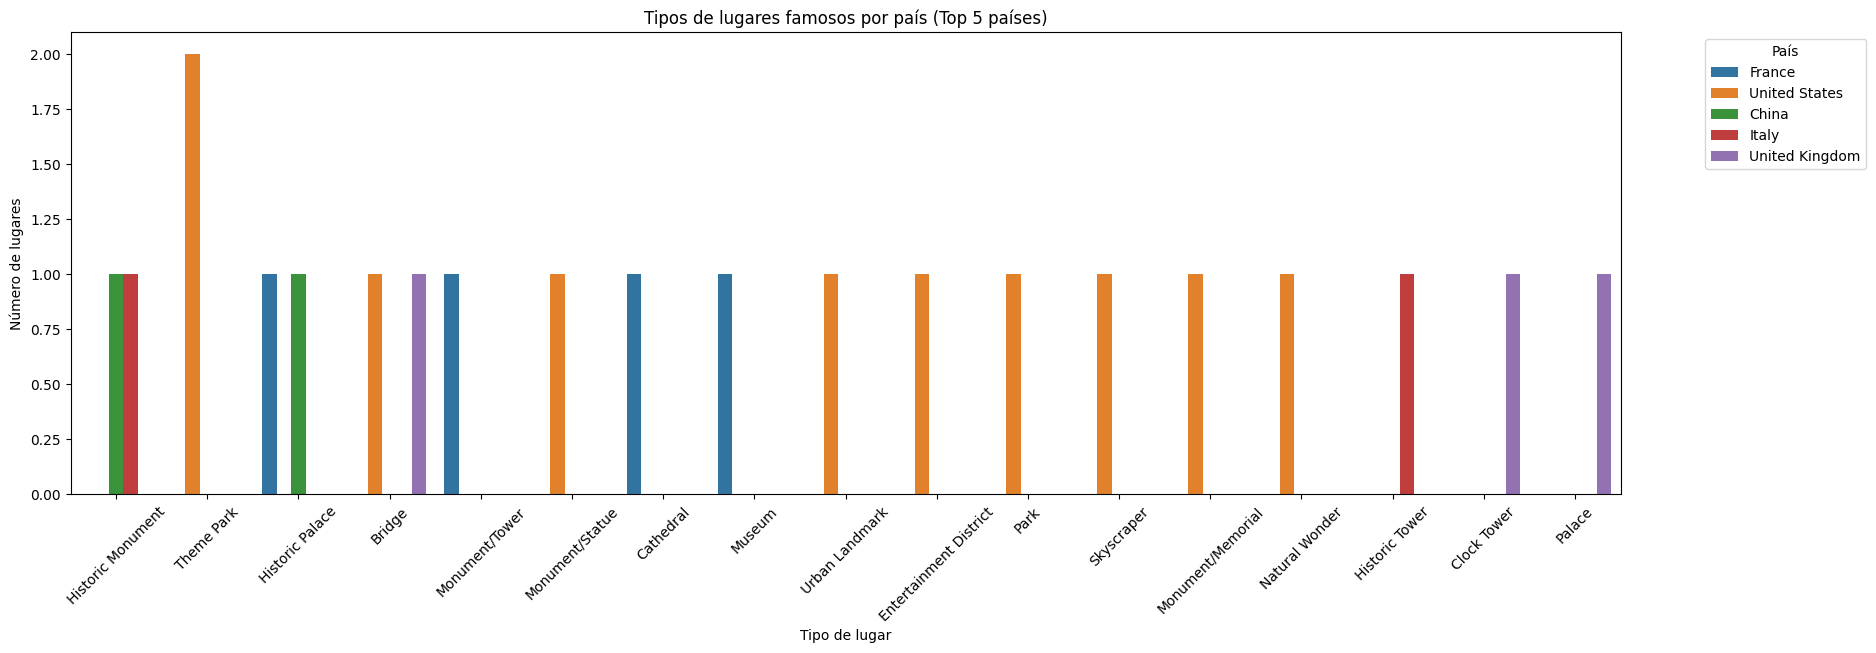

In [21]:
top_countries = df_copy['Country'].value_counts().head(5).index

df_top = df_copy[df_copy['Country'].isin(top_countries)]

plt.figure(figsize=(20, 6))

snb.countplot(
    data=df_top,
    x='Type',
    hue='Country',
    order=df_top['Type'].value_counts().index,
    palette='tab10'
)

plt.title('Tipos de lugares famosos por país (Top 5 países)')
plt.xlabel('Tipo de lugar')
plt.ylabel('Número de lugares')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### ¿Cómo se distribuyen los lugares famosos según su categoría?

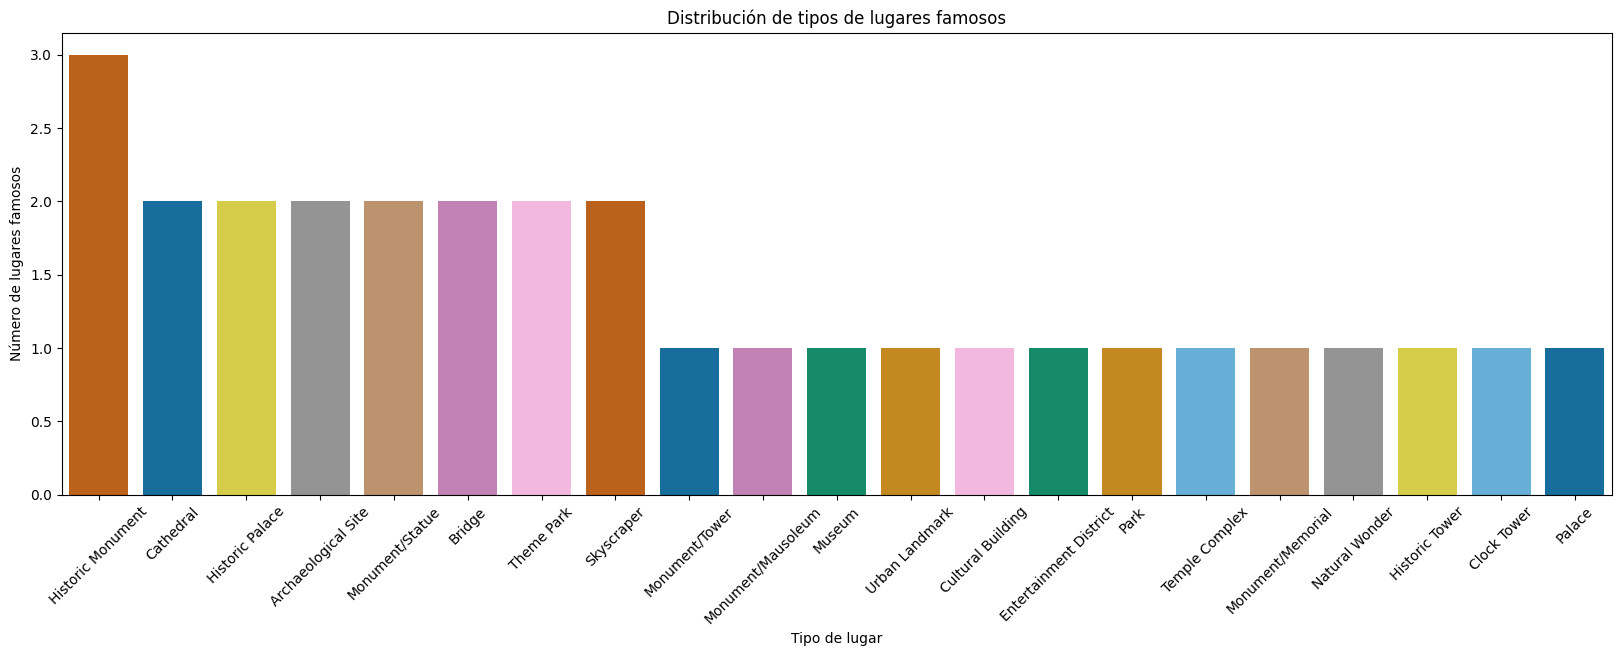

In [22]:
plt.figure(figsize=(20,6))
snb.countplot(data=df_copy, x='Type', hue='Type', order=df_copy['Type'].value_counts().index, palette='colorblind')
plt.title('Distribución de tipos de lugares famosos')
plt.xticks(rotation=45)
plt.xlabel('Tipo de lugar')
plt.ylabel('Número de lugares famosos')
plt.show()

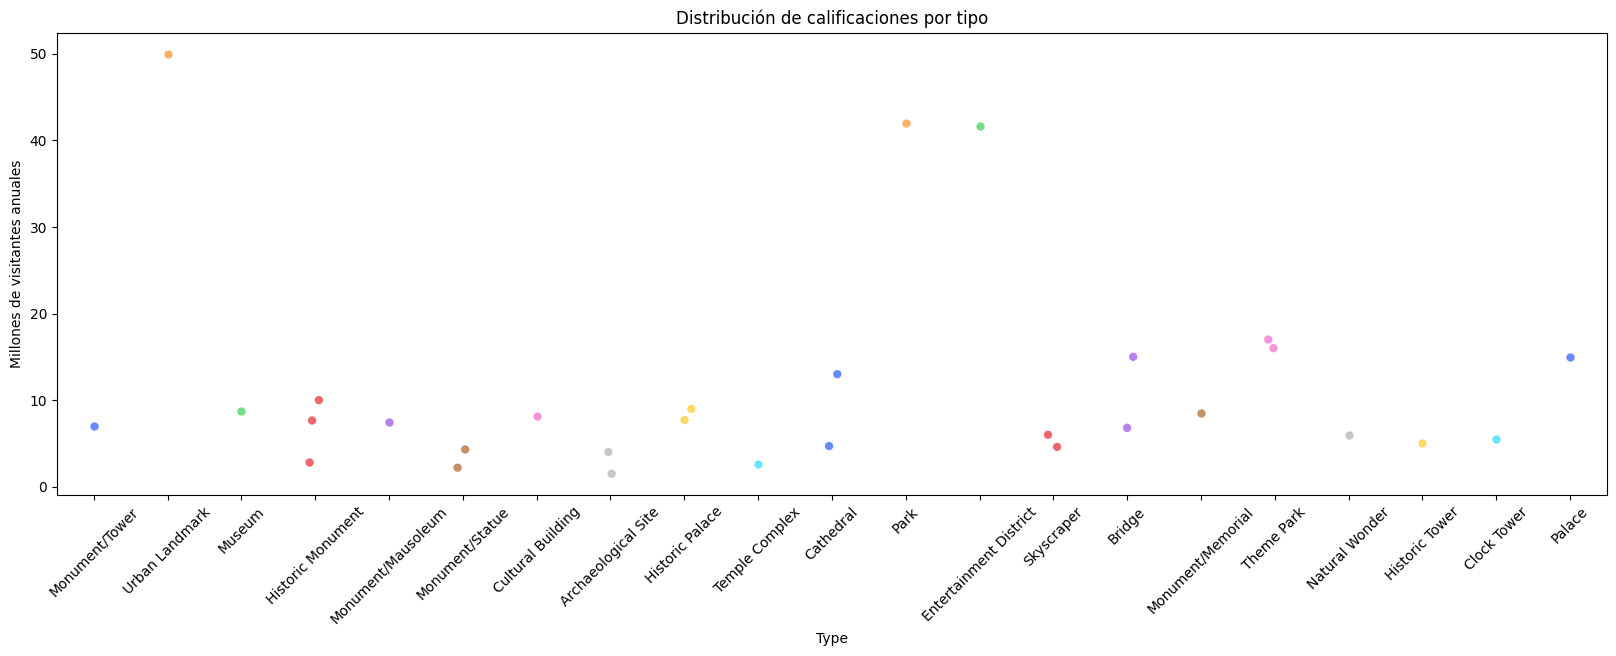

In [23]:
plt.figure(figsize=(20, 6))
snb.stripplot(
    data=df_copy,
    x='Type',
    y='Annual_Visitors_Millions',
    hue='Type',
    jitter=True,
    alpha=0.6,
    size=6,
    palette='bright'
)

plt.title('Distribución de calificaciones por tipo')
plt.xticks(rotation=45)
plt.ylabel('Millones de visitantes anuales')
plt.show()

## ¿Existen valores atípicos en la cantidad de visitantes o calificación?

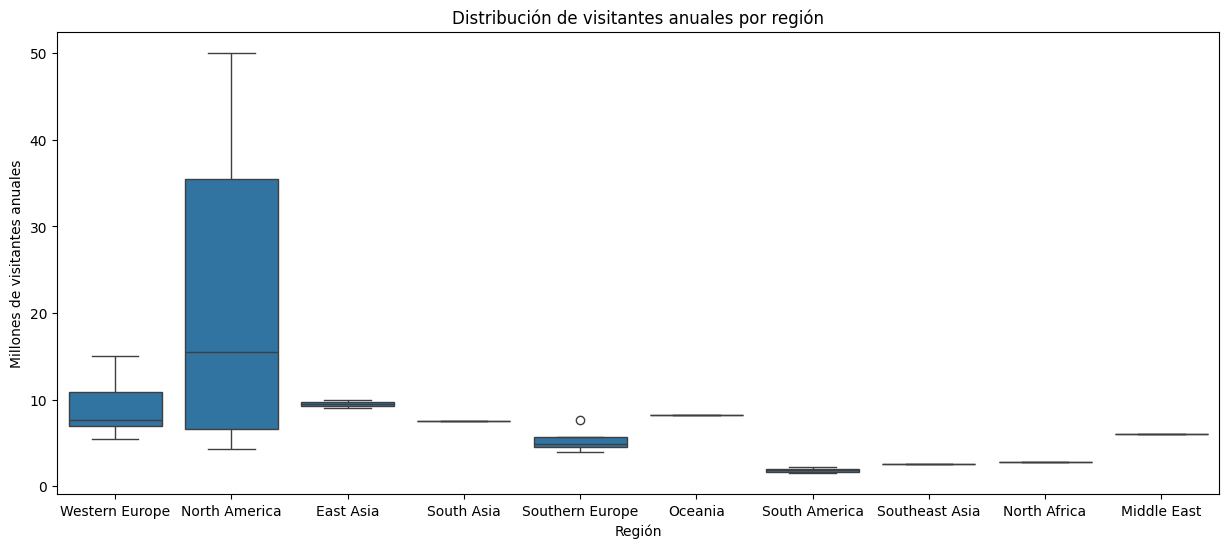

In [24]:
plt.figure(figsize=(15,6))
snb.boxplot(x=df_copy['Region'], y=df_copy['Annual_Visitors_Millions'])
plt.title('Distribución de visitantes anuales por región')
plt.xlabel('Región')
plt.ylabel('Millones de visitantes anuales')
plt.show()

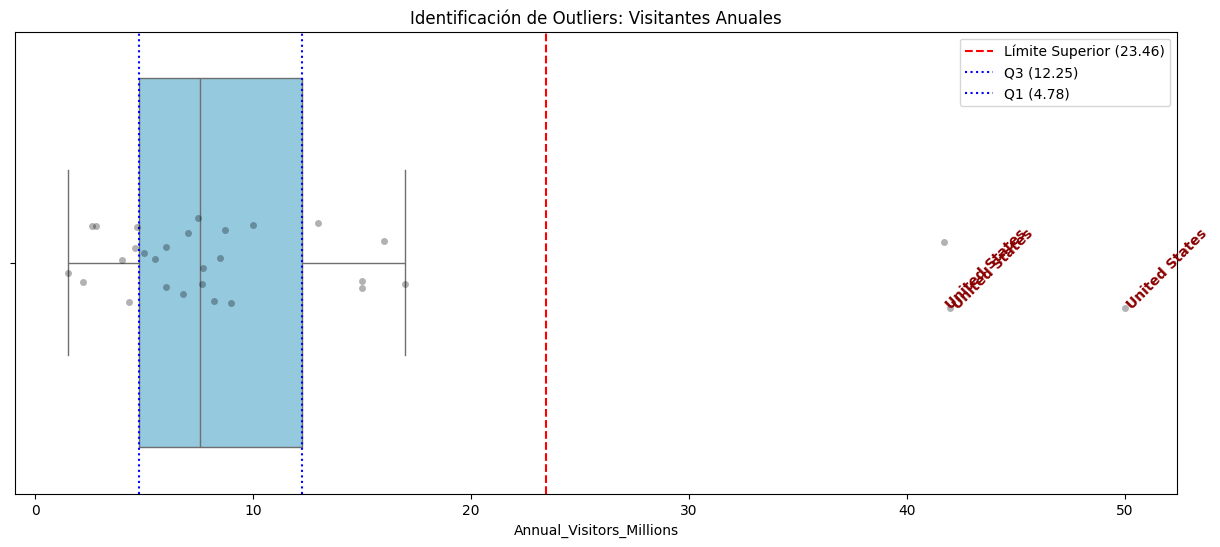

In [25]:
q1 = df_copy['Annual_Visitors_Millions'].quantile(0.25)
q3 = df_copy['Annual_Visitors_Millions'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr


plt.figure(figsize=(15, 6))
col = 'Annual_Visitors_Millions'

# 1. Creamos el boxplot (quitamos los puntos automáticos con showfliers=False para controlarlos nosotros)
snb.boxplot(x=df_copy[col], color="skyblue", showfliers=False)

# 2. Dibujamos los puntos reales encima (incluyendo los outliers en rojo)
snb.stripplot(x=df_copy[col], color="black", alpha=0.3, jitter=True)

# 3. Dibujamos las líneas de tus cálculos
plt.axvline(limite_superior, color='red', linestyle='--', label=f'Límite Superior ({limite_superior:.2f})')
plt.axvline(q3, color='blue', linestyle=':', label=f'Q3 ({q3:.2f})')
plt.axvline(q1, color='blue', linestyle=':', label=f'Q1 ({q1:.2f})')

# 4. Etiquetar los outliers más importantes para decidir qué hacer con ellos
outliers = df_copy[df_copy[col] > limite_superior].sort_values(col, ascending=False).head(5)
for i, row in outliers.iterrows():
    plt.text(row[col], 0.1, row['Country'], rotation=45, color='darkred', weight='bold')

plt.title('Identificación de Outliers: Visitantes Anuales')
plt.legend()
plt.show()



## ¿Cuál es la mejor época del año más frecuente para visitar los lugares famosos?

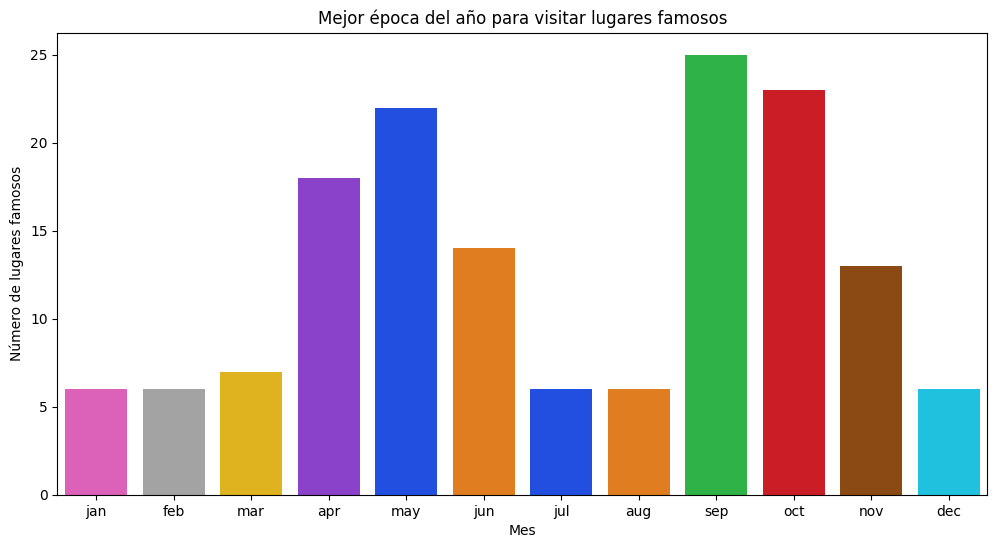

In [26]:
# Best time in the year to visit
plt.figure(figsize=(12, 6))

# Usamos sns (no snb) y quitamos el parámetro 'y'
snb.countplot(
    data=df.explode('Best_Visit_Month'), 
    x='Best_Visit_Month',
    hue='Best_Visit_Month', 
    order=MONTHS, 
    palette='bright'
)

plt.title('Mejor época del año para visitar lugares famosos')
plt.xlabel('Mes')
plt.ylabel('Número de lugares famosos')
plt.show()